In [19]:
%pylab inline 
import cv2, time
import dlib
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


In [20]:
from dlib_utils import extract_left_eye_center, extract_right_eye_center, get_rotation_matrix, crop_image

In [3]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [4]:
img = cv2.cvtColor(cv2.imread('./data/bradpit3.jpg'), cv2.COLOR_BGR2RGB)

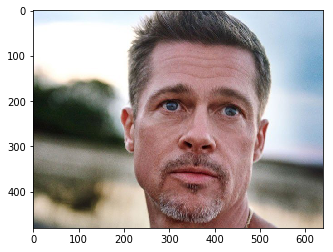

In [31]:
plt.imshow(img)

In [32]:
img.shape

(480, 640, 3)

In [45]:
s_height, s_width = img.shape[:2]

0.2867217809762792


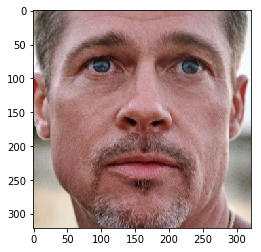

In [61]:
tic = time.clock()


dets = detector(img, 1)

for i, det in enumerate(dets):
    shape = predictor(img, det)
    left_eye = extract_left_eye_center(shape)
    right_eye = extract_right_eye_center(shape)
    M = get_rotation_matrix(left_eye, right_eye)
    rotated = cv2.warpAffine(img, M, (s_width, s_height), flags=cv2.INTER_CUBIC)
    aligned_face = crop_image(rotated, det)


toc = time.clock()
print(toc - tic)

plt.imshow(aligned_face)

0.6732708184267722


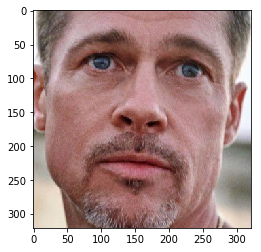

In [62]:
tic = time.clock()

def detect_face(image):
    face_detector = dlib.get_frontal_face_detector()
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]
    return face_frames

detected_face = detect_face(img)
for n, face_rect in enumerate(detected_face):
    face = Image.fromarray(img).crop(face_rect)

toc = time.clock()
print(toc - tic)

plt.imshow(face)

0.06652608049648734

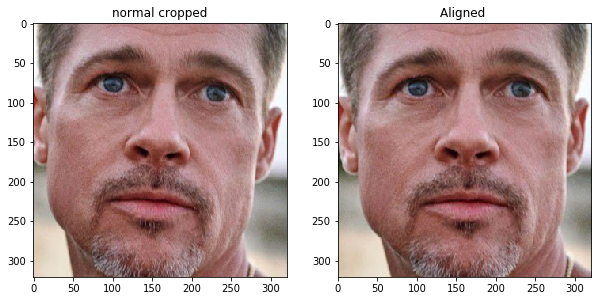

In [66]:
# plt.imshow(aligned)
tic = time.clock()
plt.figure(figsize=(10,10))

plt.subplot(1, 2, 2)
plt.imshow(aligned_face)
plt.title("Aligned ")


plt.subplot(1, 2, 1)
plt.imshow(face)
plt.title("normal cropped")

toc = time.clock()
toc - tic